# Fly Ash Future Generation Based on Coal Consumption

## Poblem Statement: 

*The energy consumption increased every year in India and the major contribution in energy generation is from COAL.

*In thermal power plants the combustion of coal results into FLY ASH generation. 

*The Fly ash is not utilized efficiently and dumped as solid or discharged with water.

*The increase in fly ash generation is not a problem, we need to think or plan how to use it efficiently.

*Mainly it is used in cement production.

*We need to planned new utlization sector or expand existing sector  accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel("F:\PROJECT\MTECH PROJ\LIT_SURVEY_EXCEL\Fly_Ash_ML_Project.xlsx",
                 names=['Year','Studied Power Stations','Installed Capacity (MW)','Coal consumption (MT)','Fly Ash Generation (MT)'])

In [3]:
df

,Year,Studied Power Stations,Installed Capacity (MW),Coal consumption (MT),Fly Ash Generation (MT)
0,2014,124,105925.3,437.41,145.42
1,2015,138,120312.3,482.97,163.56
2,2016,143,133381.3,523.52,99.62
3,2017,145,138915.8,549.72,184.14
4,2018,151,145044.8,536.64,176.74
5,2019,155,145044.8,536.40,169.25
6,2020,167,177070.0,624.88,196.44
7,2021,195,197966.5,667.43,217.04


Year is not date type ; we need to convert date into year and drop year


In [4]:
df.describe()

,Year,Studied Power Stations,Installed Capacity (MW),Coal consumption (MT),Fly Ash Generation (MT)
count,8.00000,8.000000,8.000000,8.000000,8.00000
mean,2017.50000,152.250000,145457.600000,544.871250,169.02625
std,2.44949,21.359173,29618.021167,73.115011,35.35367
min,2014.00000,124.000000,105925.300000,437.410000,99.62000
25%,2015.75000,141.750000,130114.050000,513.382500,159.02500
50%,2017.50000,148.000000,141980.300000,536.520000,172.99500
75%,2019.25000,158.000000,153051.100000,568.510000,187.21500
max,2021.00000,195.000000,197966.500000,667.430000,217.04000


### By doing this, we can take statistical overview of our data in quick

## Data Vizualization

### 1. How power station increases each year

Text(0, 0.5, 'Power Stations')

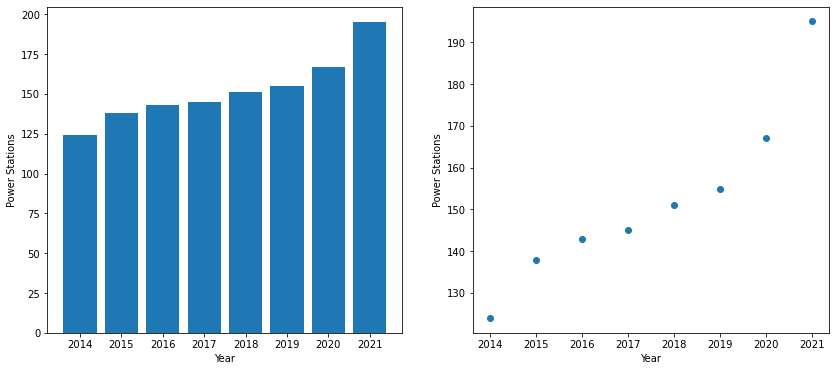

In [5]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.bar(df['Year'], df['Studied Power Stations'])
plt.xlabel('Year')
plt.ylabel('Power Stations')

plt.subplot(122)
plt.scatter(df['Year'], df['Studied Power Stations'])
plt.xlabel('Year')
plt.ylabel('Power Stations')

### 2. How the number of power stations increases each year

  > plants Linearly increases each year


### 2.1 Outliear detection  and Removal

#### Distribution PLot and Box Plot

#### Methods: Normal Distribution, Z-score, IQR and Percentile

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Studied Power Stations'>

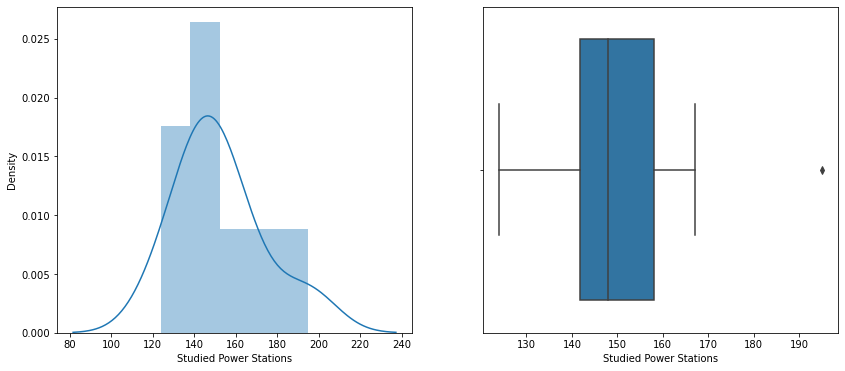

In [6]:
plt.figure(figsize=(14,6))

plt.subplot(121)
sns.distplot(df['Studied Power Stations'])

plt.subplot(122)
sns.boxplot(df['Studied Power Stations'])

### Conclusion From PLots
 1. Distribution is kind of normal
 2. One outlier

In [7]:
#OUTIER DETECTION

mean_pp=df['Studied Power Stations'].mean()
std_pp =df['Studied Power Stations'].std()

pp_outlier= df[(df['Studied Power Stations']< (mean_pp-3*std_pp)) | (df['Studied Power Stations']>(mean_pp+3*std_pp))]

In [8]:
pp_outlier

,Year,Studied Power Stations,Installed Capacity (MW),Coal consumption (MT),Fly Ash Generation (MT)


#### >>no outlier detection from this method

#### >>we can apply linear regression on given data to predict the future count of power stations

In [9]:
df1 = (df['Studied Power Stations']-mean_pp)/std_pp

In [10]:
df1

0   -1.322617
1   -0.667161
2   -0.433069
3   -0.339433
4   -0.058523
5    0.128750
6    0.690570
7    2.001482
Name: Studied Power Stations, dtype: float64

### All values(z-score) are in the range of (-3, 3)
1. therefore no outlier present in the data and distribution is also kind of normal
2. we can use linear regression on this 

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(df['Year'],df['Studied Power Stations'], test_size=0.30)

In [20]:
x_train_2d=x_train.array.reshape(-1,1)
lr.fit(x_train_2d,y_train)

LinearRegression()

In [21]:
y_test

6    167
5    155
2    143
Name: Studied Power Stations, dtype: int64

In [22]:
x_test_2d=x_test.array.reshape(-1,1)
lr.predict(x_test_2d)

array([178.9       , 169.46666667, 141.16666667])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Ana

<AxesSubplot:xlabel='Coal consumption (MT)'>

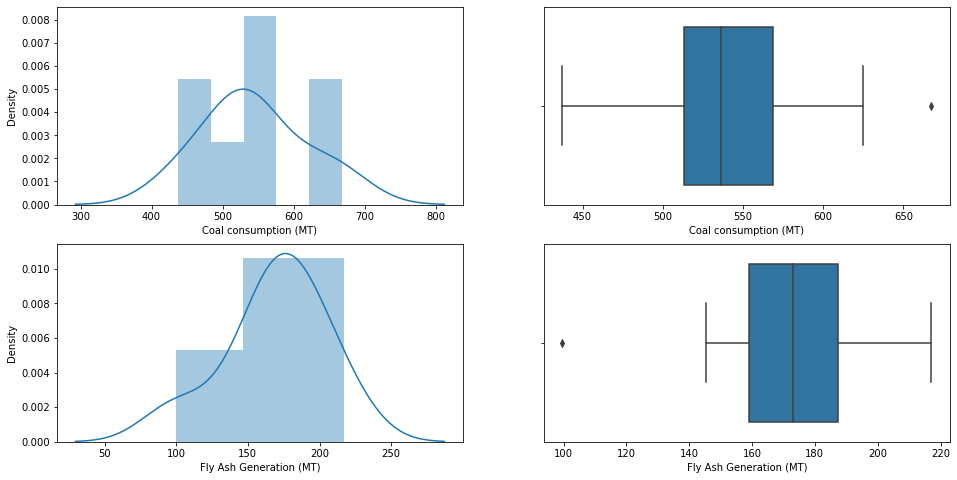

In [23]:
import seaborn as sns
plt.figure(figsize=(16,8))
plt.subplot(223)
sns.distplot(df['Fly Ash Generation (MT)'])
plt.subplot(224)
sns.boxplot('Fly Ash Generation (MT)', data= df)

plt.subplot(221)
sns.distplot(df['Coal consumption (MT)'])
plt.subplot(222)
sns.boxplot('Coal consumption (MT)', data= df)

## Feature Engineering on whole data set

In [24]:
df

,Year,Studied Power Stations,Installed Capacity (MW),Coal consumption (MT),Fly Ash Generation (MT)
0,2014,124,105925.3,437.41,145.42
1,2015,138,120312.3,482.97,163.56
2,2016,143,133381.3,523.52,99.62
3,2017,145,138915.8,549.72,184.14
4,2018,151,145044.8,536.64,176.74
5,2019,155,145044.8,536.40,169.25
6,2020,167,177070.0,624.88,196.44
7,2021,195,197966.5,667.43,217.04


### 1. No missing values
### 2. No outliers 
### 3. No feature extraction and feature selection

## Only feature scaling required 

In [27]:
X=df.drop(columns=['Fly Ash Generation (MT)'])
Y=df['Fly Ash Generation (MT)']

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_transformed=scaler.fit_transform(X_train,Y_train)
X_test_transformed=scaler.transform(X_test)

In [32]:
X_train_transformed

array([[-0.34554737, -0.59486929, -0.5011349 , -0.29691665],
       [-1.2094158 , -0.92535223, -1.1391025 , -1.28866939],
       [-0.77748158, -0.68929299, -0.69092884, -0.68618889],
       [ 0.95025527,  0.44379138,  0.80728253,  0.8197895 ],
       [ 1.38218948,  1.76572313,  1.52388371,  1.45198543]])

In [33]:
X_test_transformed

array([[-1.64135001, -1.58631811, -1.63247417, -1.96558706],
       [ 0.51832106, -0.12275081, -0.29095383, -0.49482147],
       [ 0.08638684, -0.3115982 , -0.29095383, -0.49125562]])

In [34]:
Y_test

0    145.42
5    169.25
4    176.74
Name: Fly Ash Generation (MT), dtype: float64

In [35]:
lr.fit(X_train,Y_train)

LinearRegression()

In [36]:
lr.predict(X_test)

array([170.7114973 , 667.73460913, 392.38028261])